# Capstone Project : Clasification Problem

**Overview**: The objective of the project is to develop a classification model that predicts which bank customers are likely to close their accounts. Additionally, the study aims to identify and analyze the key factors contributing to customer attrition.  



### Getting Started

I have sourced the data from Kaggle which they conducted as part of the playground series couple of years ago. (https://www.kaggle.com/competitions/playground-series-s4e1/data).



### Step 1: Understanding the Data

To gain a better understanding of the data, Analysing the data and performing EDA.

In [1]:
# Problem stattemnet
#Task is to predict whether a customer continues with their account or closes it (e.g., churns)


### Step 2: Read in the Data

Use pandas to read in the dataset `train.csv`.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/train.csv', sep = ',')

In [4]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Step 3: Understanding the Features & Analysing


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object
 5   Gender           165034 non-null  object
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64


Output variable (desired target):
 13  Exited           165034 non-null  int64
```



In [5]:
df.nunique()

,0
id,165034
CustomerId,23221
Surname,2797
CreditScore,457
Geography,3
Gender,2
Age,71
Tenure,11
Balance,30075
NumOfProducts,4


In [6]:
df['Geography'].unique()
#df['CreditScore'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'Count of Null')

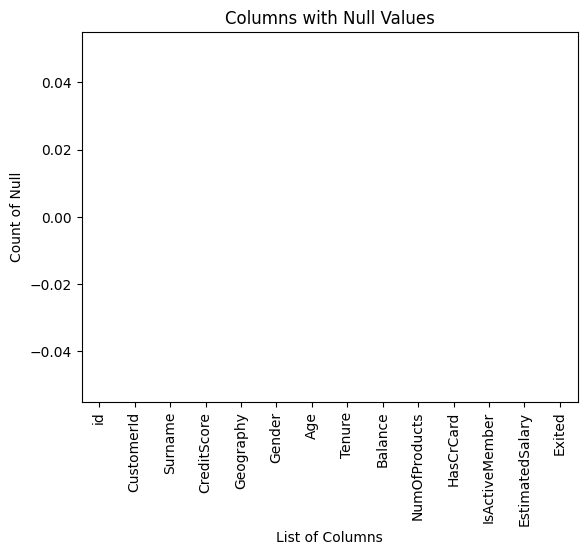

In [8]:
# Null values
#Graphical representation of null values
df.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Columns with Null Values')
plt.xlabel('List of Columns')
plt.ylabel('Count of Null')

In [8]:
df.describe([0.25,0.50,0.75, 0.85,0.90]).T # Numeric summary


,count,mean,std,min,25%,50%,75%,85%,90%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,1.402780e+05,148529.70,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,1.577819e+07,15790678.00,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,7.350000e+02,754.00,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,4.600000e+01,50.00,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,8.000000e+00,9.00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,1.320887e+05,139959.05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,2.000000e+00,2.00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.000000e+00,1.00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.000000e+00,1.00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,1.708296e+05,176843.53,199992.48


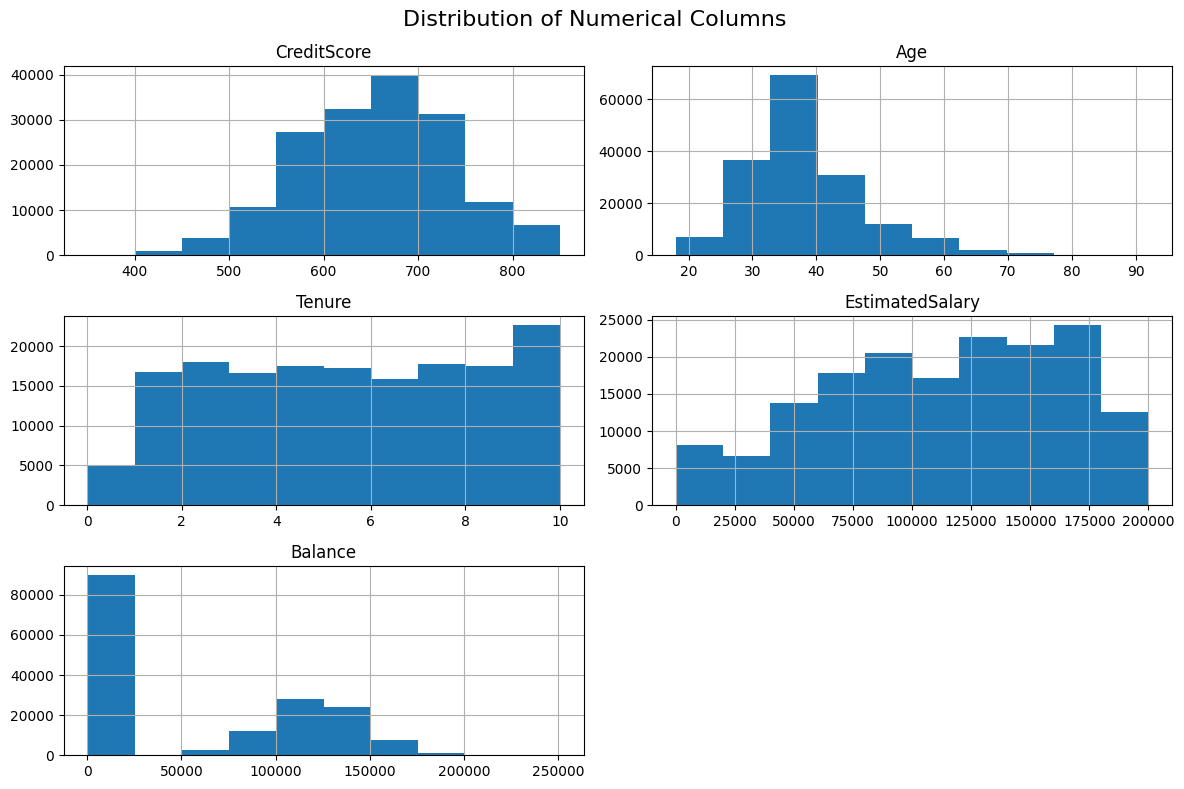

In [7]:
#Main Numerical Columns Histogram only few columns
num_cols = ['CreditScore', 'Age','Tenure', 'EstimatedSalary', 'Balance']
df[num_cols].hist(figsize = (12,8))
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.tight_layout()
plt.show()

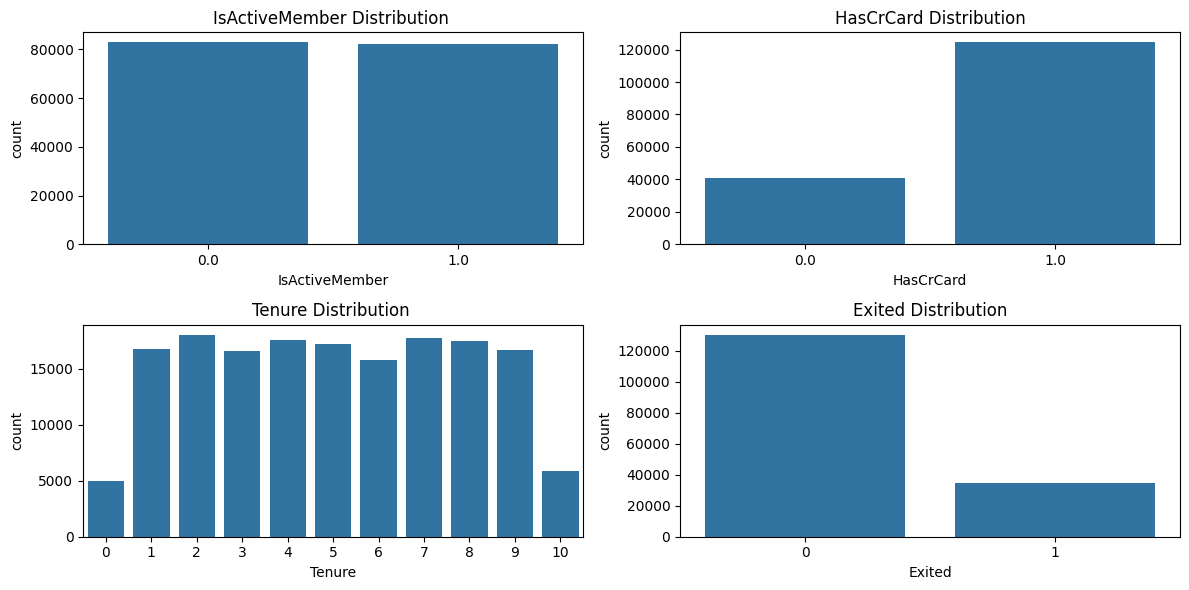

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
plt.title('IsActiveMember Distribution ')
sns.countplot(x='IsActiveMember', data=df)

plt.subplot(2,2,2)
plt.title('HasCrCard Distribution')
sns.countplot(x='HasCrCard', data=df)

plt.subplot(2,2,3)
plt.title('Tenure Distribution ')
sns.countplot(x='Tenure', data=df)

plt.subplot(2,2,4)
plt.title('Exited Distribution')
sns.countplot(x='Exited', data=df)

plt.tight_layout()
plt.show()

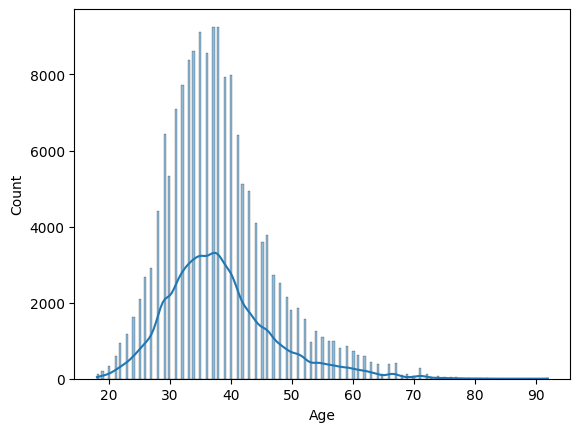

In [12]:
sns.histplot(x='Age', data=df, kde=True)     # Age distribution
plt.show()

In [13]:
# Based on the above Data and below are the observations
#1. CreditScore ranges from 350 to 850. More than 75% of the customers score is 710 and less. 50% of the cusomer score is less than 660. ##### which is Normal
#2. Age -- Average Customer base is 38 Years. 75 % of the cusotomers are 42 and less than that. Max is 92 % . it is Right skewed
#3. Tenure -- 50% of the customer stays for 5 Years- Mean is 5 Years. Also more than 75% of the customer has tenure of 7 years or less. Max is 10.
    # Tenure is fairly evenly distributed between 1 to 9 years.
#4. EstimatedSalary -- 50% of the customer hold a salary of 117K . Average - 112K- Max of 200K. 75% of the cusomers salary is 155K . which is right skewed.
#5. Balance -- Max is 250K. But 50% of the customer has 0 balance.
#6. NumOfProducts - 75% of the customers have 2 products.
#7 Customers are almost evenly split between inactive and active members.


In [14]:
# Categorical summary
df.describe(include=['object']).T

,count,unique,top,freq
Surname,165034,2797,Hsia,2456
Geography,165034,3,France,94215
Gender,165034,2,Male,93150


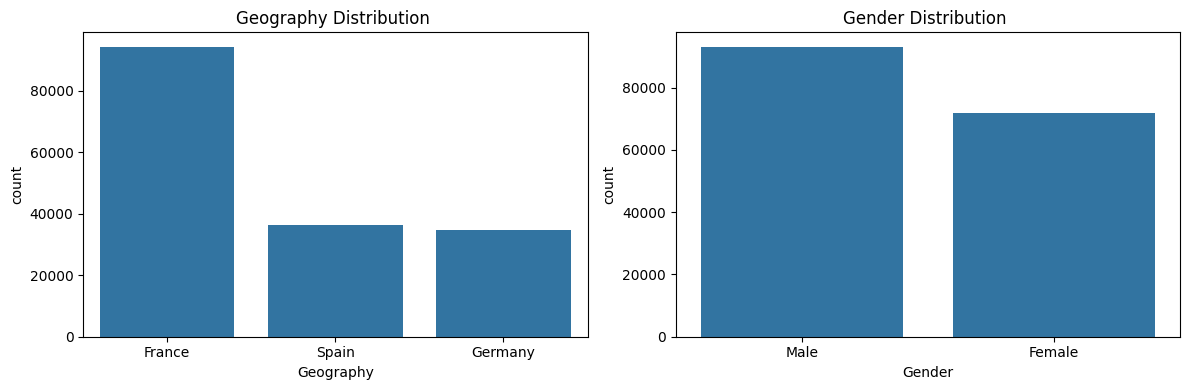

In [15]:
# Geography distribution
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.title('Geography Distribution ')
sns.countplot(x='Geography', data=df)


plt.subplot(1,2,2)
plt.title('Gender Distribution ')
sns.countplot(x='Gender', data=df)
plt.tight_layout()
plt.show()


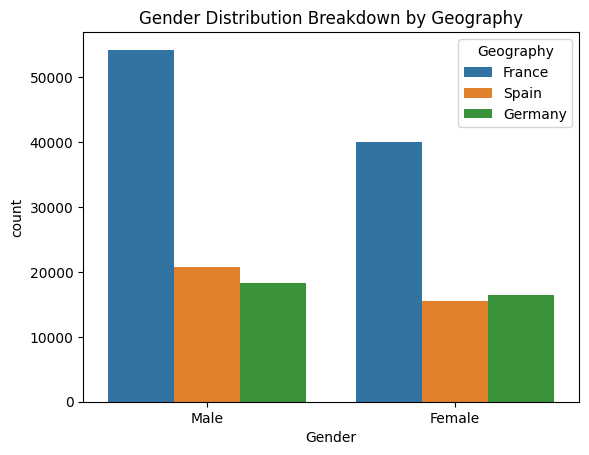

In [16]:
sns.countplot(x='Gender', data=df, hue = 'Geography')     # Male vs Female counts with Geography
plt.title('Gender Distribution Breakdown by Geography')
plt.show()

In [17]:
df['Geography'].groupby(df['Geography']).value_counts()/len(df)

,,count
Geography,Geography,
France,France,0.570882
Germany,Germany,0.209690
Spain,Spain,0.219428


In [18]:
df['Geography'].groupby(df['Gender']).value_counts()

Gender  Geography
Female  France       39976
        Germany      16388
        Spain        15520
Male    France       54239
        Spain        20693
        Germany      18218
Name: count, dtype: int64

In [19]:
df['Gender'].groupby(df['Gender']).value_counts()/len(df)

,,count
Gender,Gender,
Female,Female,0.435571
Male,Male,0.564429


In [43]:
#Majority of customers are from France (57%), followed by Spain (21%) and Germany (20%).
#The dataset has more male customers (56.4%) than female customers (43.5%).

In [20]:
# Chrun Analysis
print(df.groupby('Geography')[['Exited']].mean().round(2))
print(df.groupby('Gender')[['Exited']].mean().round(2))

           Exited
Geography        
France       0.17
Germany      0.38
Spain        0.17
        Exited
Gender        
Female    0.28
Male      0.16


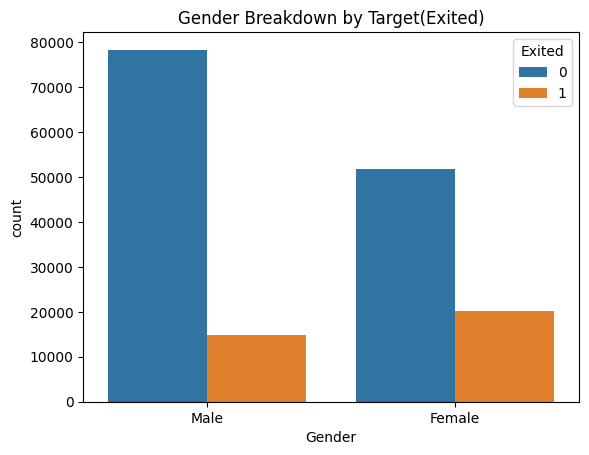

In [21]:
# Bivariate Analysis & plots
#num_cols = ['CreditScore', 'Age','Tenure', 'EstimatedSalary', 'Balance']

sns.countplot(x='Gender', hue='Exited', data=df)          # Gender vs Exixted
plt.title('Gender Breakdown by Target(Exited)')
plt.show()

Text(0.5, 1.0, 'Age Breakdown by Target(Exited)')

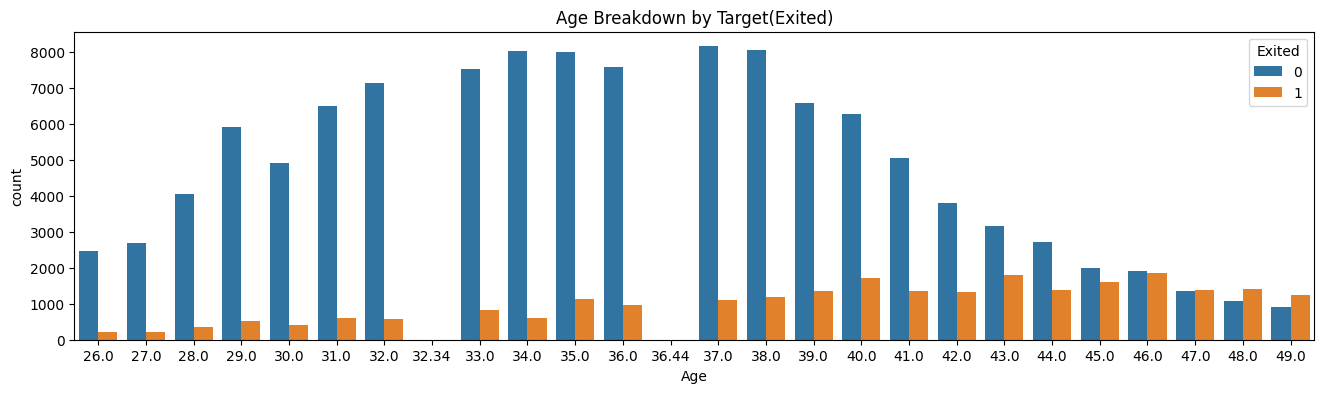

In [22]:
df_filter_G20 = df.query("Age > 25 and Age < 50")
plt.figure(figsize=(16, 4))
sns.countplot(x='Age', hue='Exited', data=df_filter_G20)          # Age vs Taeget (Exited)
plt.title('Age Breakdown by Target(Exited)')

#df.groupby('Age')[['Exited']].mean().round(2)/len(df)


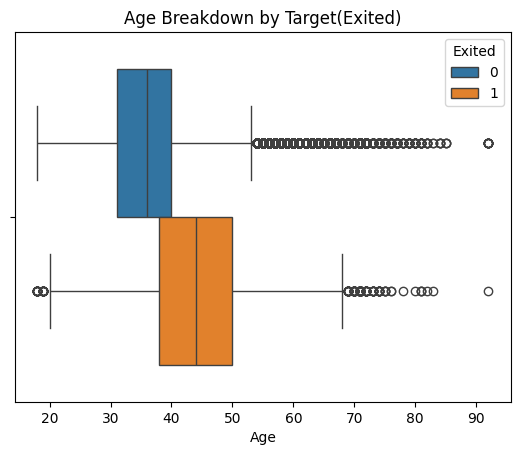

In [23]:
sns.boxplot(x='Age', hue='Exited', data=df)
plt.title('Age Breakdown by Target(Exited)')
plt.show()

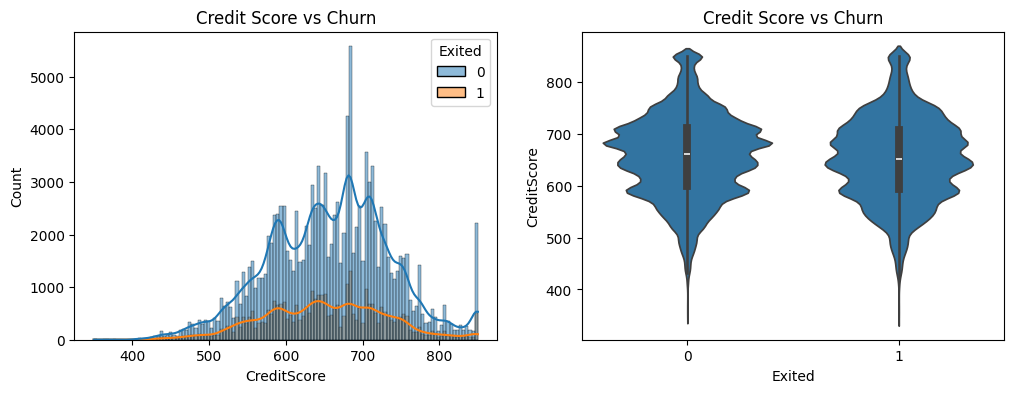

In [24]:

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='CreditScore', hue='Exited', fill=True, kde = True)
plt.title("Credit Score vs Churn")

plt.subplot(1,2,2)
sns.violinplot(x='Exited', y='CreditScore', data=df)
plt.title("Credit Score vs Churn")
plt.show()

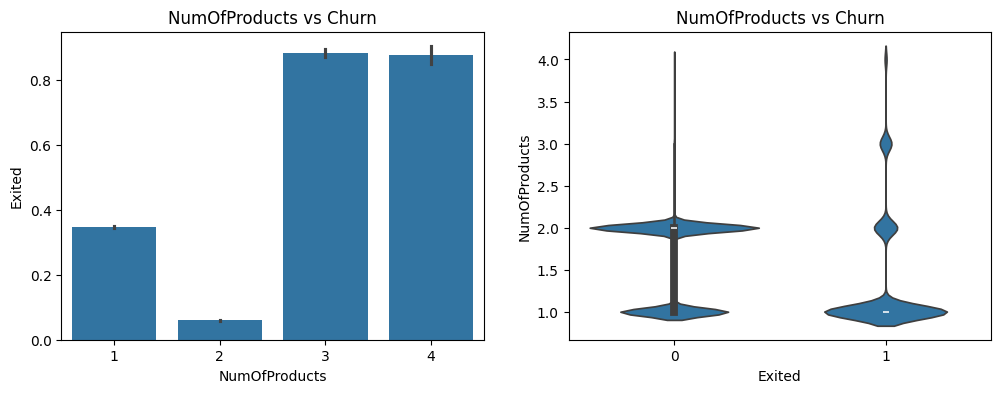

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.barplot(data=df, x='NumOfProducts', y='Exited')
plt.title("NumOfProducts vs Churn")

plt.subplot(1,2,2)
sns.violinplot(x='Exited', y='NumOfProducts', data=df)
plt.title("NumOfProducts vs Churn")
plt.show()

In [26]:
pd.crosstab(df['Gender'], df['Exited'], normalize='index')


Exited,0,1
Gender,,
Female,0.720313,0.279687
Male,0.840945,0.159055


In [27]:
#Multivariate
pd.crosstab([df['Geography'] ,df['Gender']] , df['Exited'], normalize='index')

Exited                   0         1
Geography Gender                    
France    Female  0.774815  0.225185
          Male    0.878869  0.121131
Germany   Female  0.536490  0.463510
          Male    0.697113  0.302887
Spain     Female  0.774034  0.225966
          Male    0.868168  0.131832

Text(0.5, 1.0, 'Credit Score vs Churn')

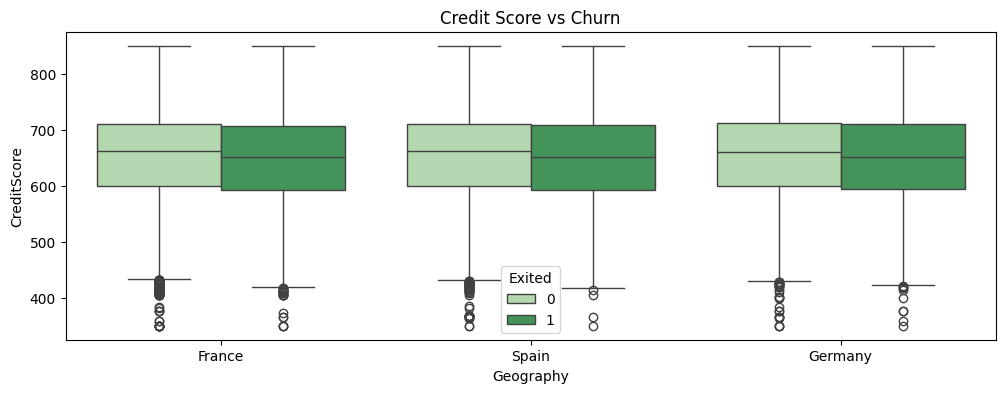

In [28]:

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='Geography', y='CreditScore',hue = 'Exited', palette= 'Greens')
plt.title("Credit Score vs Churn")


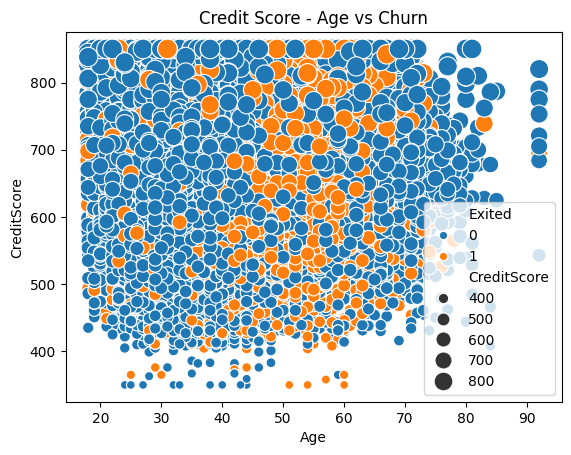

In [29]:
sns.scatterplot(x='Age', y='CreditScore', hue = 'Exited', data=df , size = 'CreditScore' , sizes = (40,200) )
plt.title("Credit Score - Age vs Churn")
plt.show()

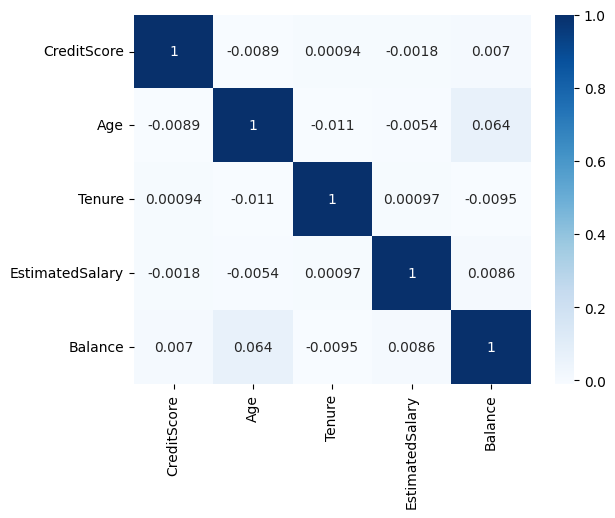

In [30]:
## Correlation matrix

num_cols = ['CreditScore', 'Age','Tenure', 'EstimatedSalary', 'Balance']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.show()

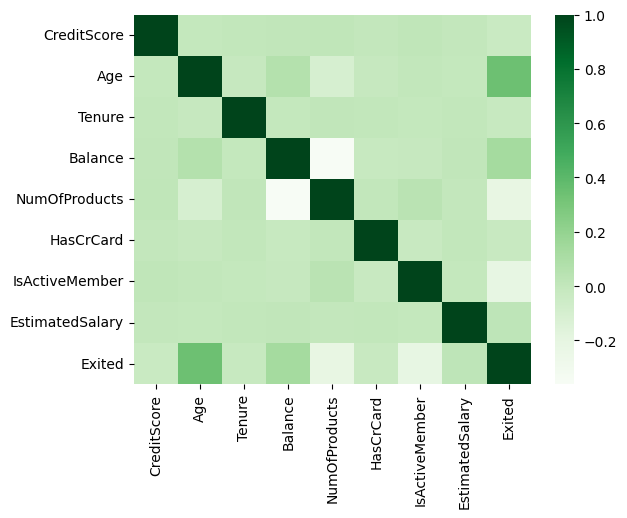

In [108]:
num_cols = ['CreditScore', 'Age','Tenure', 'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary', 'Exited']
sns.heatmap(df[num_cols].corr(),  cmap='Greens')  # Correlation matrix

plt.show()

In [32]:
#The dataset has more male customers (56.4%) than female customers (43.5%).
#Younger customer stayed while older customer exixted.
#Female Customer Exited by 27% compared to Male 15%
#when compared to the Georaphy
 #1 - Germany Female - 46% exited when compared to 22% for France & Spain
 #2-  Germany Male - 30 % Exited when compared to 12% and 13 % for France & spain
#Age and Balance are positively correlated (0.06)
#Age and CreditScore are negatively correlated
#Customers with 3 or more NumOfProducts exited than with 2 or less products.
# Credit score Range of all the geography is faily similar . Score betwen 600- 700 exited and stayed as well.
# custimer with more credit score exited by large

### Step 4: Outlier Dectection

Identfying the Outliers in the data


In [87]:
def identify_outliers(dfdata, column):
    Q1 = dfdata[column].quantile(0.15)
    Q3 = dfdata[column].quantile(0.85)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound)
    print(upper_bound)

    return dfdata[(dfdata[column] >= (lower_bound)) & (dfdata[column] <= ( upper_bound))]
    #print("Outliers:\n", outliers)

In [ ]:
#Total Rows in the DataFrame  165034

In [116]:
identify_outliers(df, 'NumOfProducts')

-0.5
3.5


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
# CreditScore, Tenure,Balance, HasCrCard, IsActiveMember , EstimatedSalary all Columns are with in the Range
# Age & NumOfProducts Has Outliers
# Age - Range 6 To 70
# NumOfProducts - Range -0.5 to 3.5


In [111]:
# Checking the Data for Age
df_Great_age70 = df.query("Age > 70")

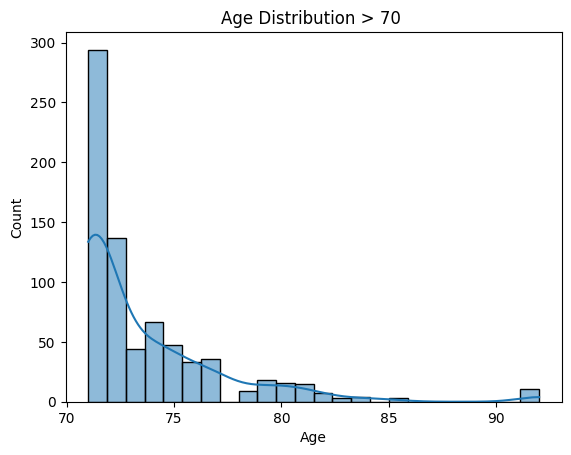

In [115]:

sns.histplot(x='Age', data=df_Great_age70, kde=True)
plt.title("Age Distribution > 70 ")    # Age distribution
plt.show()

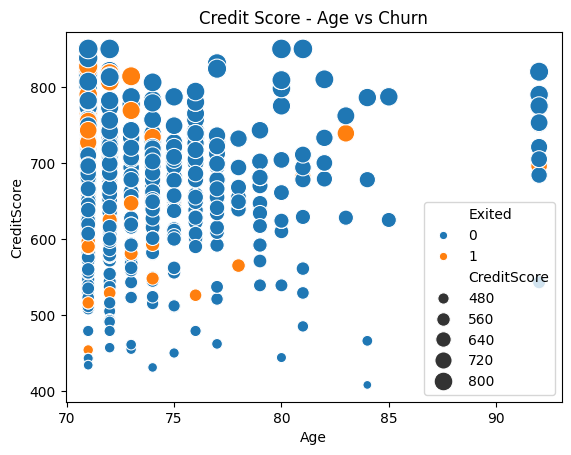

In [114]:
sns.scatterplot(x='Age', y='CreditScore', hue = 'Exited', data=df_Great_age70 , size = 'CreditScore' , sizes = (40,200) )
plt.title("Credit Score - Age vs Churn")
plt.show()

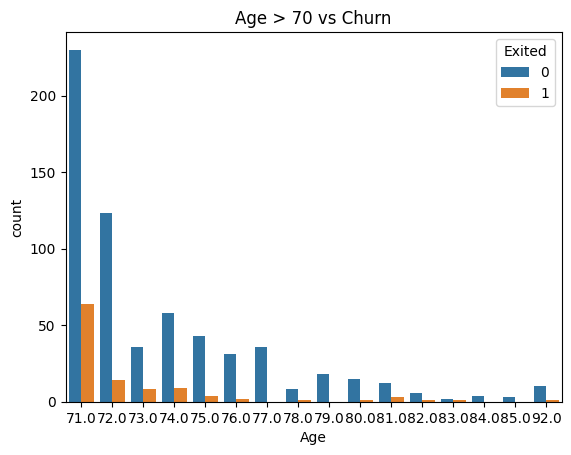

In [127]:
sns.countplot(x='Age', data=df_Great_age70, hue = 'Exited')
plt.title('Age > 70 vs Churn')
plt.show()

In [123]:
# Checking the Data for Age
df_Great3_product = df.query("NumOfProducts == 4")

In [124]:
df_Great3_product

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
182,182,15671973,Kesteven,674,Spain,Male,51.0,0,0.00,4,0.0,1.0,145562.40,1
223,223,15589475,Mazzanti,744,Germany,Male,53.0,8,108004.64,4,1.0,0.0,140941.46,1
1030,1030,15679622,Okechukwu,815,France,Male,43.0,4,0.00,4,1.0,1.0,133692.88,1
1257,1257,15670374,Wright,819,Germany,Female,36.0,1,120656.86,4,0.0,0.0,166164.30,1
1590,1590,15682463,Trevisani,706,Germany,Male,46.0,8,133070.11,4,1.0,0.0,79919.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162369,162369,15781326,Ritchie,699,Germany,Female,47.0,7,139753.83,4,0.0,1.0,57921.95,1
163369,163369,15583863,Kosisochukwu,682,Spain,Male,55.0,7,0.00,4,1.0,0.0,186778.89,1
163513,163513,15770091,Mactier,676,France,Female,48.0,4,0.00,4,1.0,0.0,102925.53,1
163549,163549,15595537,Hsia,548,Spain,Female,55.0,5,0.00,4,1.0,0.0,158036.97,1


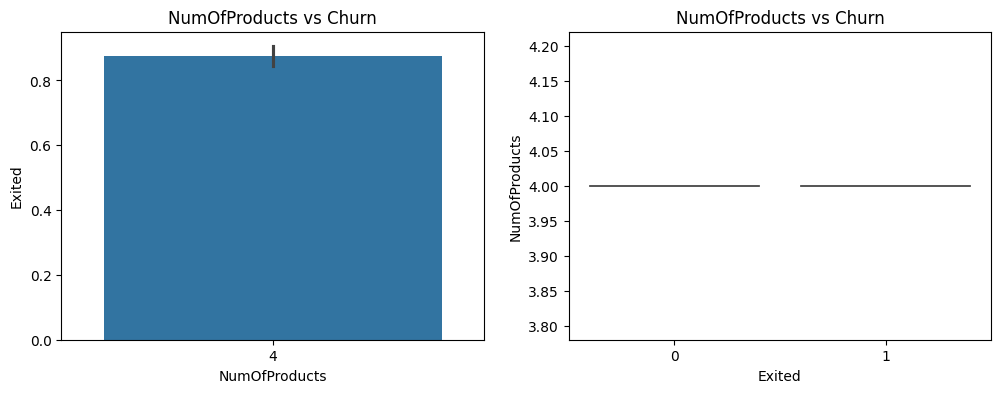

In [118]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.barplot(data=df_Great3_product, x='NumOfProducts', y='Exited')
plt.title("NumOfProducts vs Churn")

plt.subplot(1,2,2)
sns.violinplot(x='Exited', y='NumOfProducts', data=df_Great3_product)
plt.title("NumOfProducts vs Churn")
plt.show()

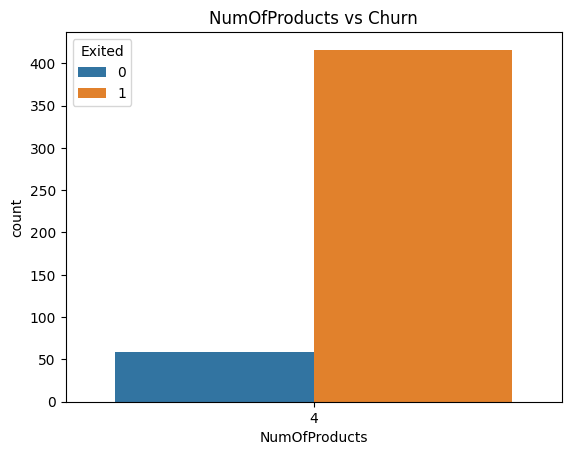

In [126]:
sns.countplot(x='NumOfProducts', hue = 'Exited', data=df_Great3_product)
plt.title("NumOfProducts vs Churn")
plt.show()

In [ ]:
# CreditScore, Tenure,Balance, HasCrCard, IsActiveMember , EstimatedSalary all Columns are with in the Range
# Age & NumOfProducts Has Outliers
# Age - Range 6 To 70
# NumOfProducts - Range -0.5 to 3.5
# Customers with 4 products exited majority of them.

### Step 5: Cleaning the data

After examining the data - EDA, Removing unwanted columns and making the data ready for Modeliing.

In [9]:
#looking at the Target column (Exited) earlier Data is not balanced.
df['Exited'].value_counts()

,count
Exited,
0,130113
1,34921


In [10]:
# we can do Oversampling or Undersampling to make the data balanced.
# but we will be loosing some majority data.
# SMOTE

In [11]:
X = df.drop(['id', 'CustomerId', 'Exited','Surname'], axis=1)
y = df['Exited']

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [13]:
y

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
165029,0
165030,0
165031,0
165032,0


In [ ]:
## Will decide about the test data set later

### Step 6: Preprocessing & Engineering

Now that we have understood the data, we will build a basic model to get started.  Before we can do this, we must work to encode the data. Split the data first and then do encoing to prevent data Leakeage

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import time

In [15]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [17]:
numerical_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#do the encoding here
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
    )

In [20]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [26]:
#BaseModel Preparation
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score, f1_score

In [27]:
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train_transformed, y_train)
y_base = baseline.predict(X_test_transformed)

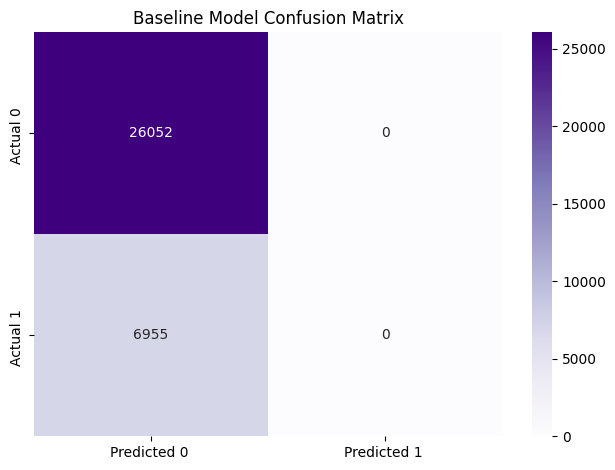

Baseline accuracy: 0.7892871209137455
Baseline precision_score: 0.0
Baseline recall_score: 0.0
Baseline f1_score: 0.0


In [34]:
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_base))
cm = confusion_matrix(y_test, y_base)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
        xticklabels=['Predicted 0 ', 'Predicted 1 '],
        yticklabels=['Actual 0 ', 'Actual 1 '])
plt.title("Baseline Model Confusion Matrix")
plt.tight_layout()
plt.show()

print("Baseline accuracy:", accuracy_score(y_test, y_base))
print("Baseline precision_score:", precision_score(y_test, y_base))
print("Baseline recall_score:", recall_score(y_test, y_base))
print("Baseline f1_score:", f1_score(y_test, y_base))

In [ ]:
# If you see the Above Confusion Matrix, The base model has Precison , Recall & f1_ score all Zero's.
# The reason is beacuse data is not balanced
# because no positives (Exited=1) were predicted


### Step 7: Fine Tuning a Baseline Model

Fine Tuning the base model so that we can get Proper Prediction rather than biased prediction

In [46]:
### Oversampling / Undersampling / SMOTE
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

#baseline = DummyClassifier(strategy='most_frequent')
#baseline.fit(X_train_res, y_train_res)
#y_base = baseline.predict(X_test_transformed)

In [45]:
###print("Confusion Matrix:\n", confusion_matrix(y_test, y_base))
#cm = confusion_matrix(y_test, y_base)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
#        xticklabels=['Predicted 0 ', 'Predicted 1 '],
#        yticklabels=['Actual 0 ', 'Actual 1 '])
#plt.title("Baseline Model Confusion Matrix")
#plt.tight_layout()
#plt.show()

#print("Baseline accuracy:", accuracy_score(y_test, y_base))
#print("Baseline precision_score:", precision_score(y_test, y_base))
#print("Baseline recall_score:", recall_score(y_test, y_base))
#print("Baseline f1_score:", f1_score(y_test, y_base))

Encoding section

### Step 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
    )
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [48]:
model = LogisticRegression()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

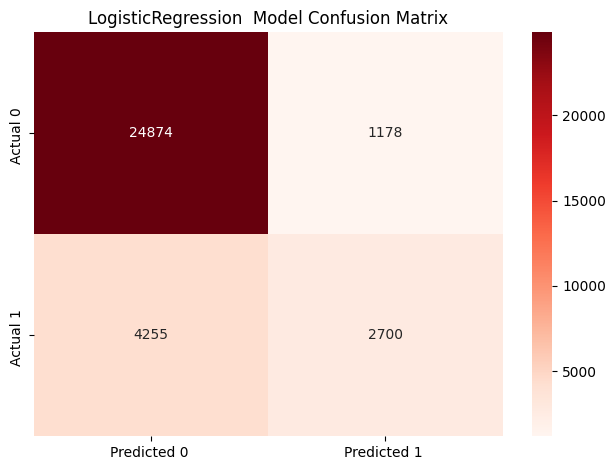

Baseline accuracy: 0.8353985518223407
Baseline precision_score: 0.6962351727694688
Baseline recall_score: 0.3882099209202013
Baseline f1_score: 0.4984768762115757


In [50]:
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_base))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
        xticklabels=['Predicted 0 ', 'Predicted 1 '],
        yticklabels=['Actual 0 ', 'Actual 1 '])
plt.title("LogisticRegression  Model Confusion Matrix")
plt.tight_layout()
plt.show()

print("Baseline accuracy:", accuracy_score(y_test, y_pred))
print("Baseline precision_score:", precision_score(y_test, y_pred))
print("Baseline recall_score:", recall_score(y_test, y_pred))
print("Baseline f1_score:", f1_score(y_test, y_pred))

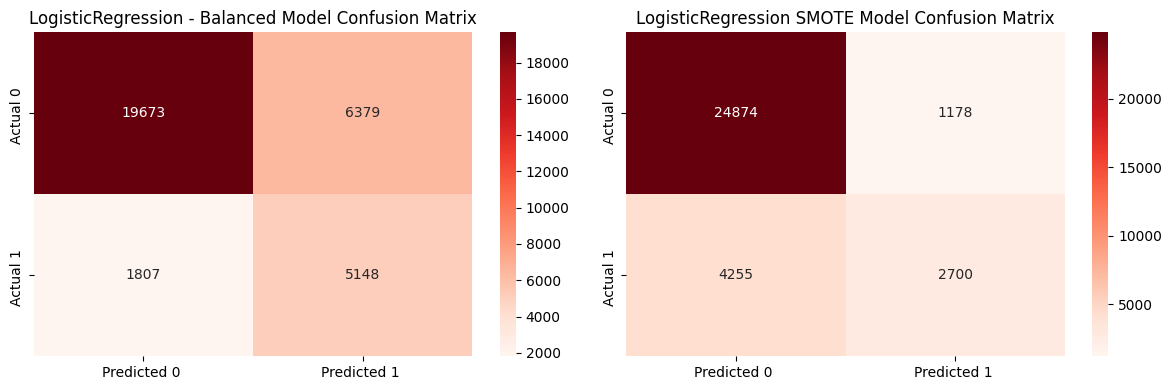

,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression - Balanced,0.751992,0.446604,0.740187,0.557083
1,LogisticRegression - SMOTE,0.835399,0.696235,0.388210,0.498477


In [59]:
from imblearn.over_sampling import SMOTENC

results = []

model_bal = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_bal.fit(X_train_transformed, y_train)
y_pred_bal = model_bal.predict(X_test_transformed)

categorical_columns = [1,2]

smote = SMOTENC(categorical_features=categorical_columns, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test_transformed)


#print("Confusion Matrix:\n", confusion_matrix(y_test, y_base))
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
cm_bal = confusion_matrix(y_test, y_pred_bal)
sns.heatmap(cm_bal, annot=True, fmt='d', cmap='Reds',
        xticklabels=['Predicted 0 ', 'Predicted 1 '],
        yticklabels=['Actual 0 ', 'Actual 1 '])
plt.title("LogisticRegression - Balanced Model Confusion Matrix")

results.append(['LogisticRegression - Balanced', accuracy_score(y_test, y_pred_bal), precision_score(y_test, y_pred_bal), recall_score(y_test, y_pred_bal), f1_score(y_test, y_pred_bal)])


plt.subplot(1,2,2)
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Reds',
        xticklabels=['Predicted 0 ', 'Predicted 1 '],
        yticklabels=['Actual 0 ', 'Actual 1 '])
plt.title("LogisticRegression SMOTE Model Confusion Matrix")

results.append(['LogisticRegression - SMOTE', accuracy_score(y_test, y_pred_smote), precision_score(y_test, y_pred_smote), recall_score(y_test, y_pred_smote), f1_score(y_test, y_pred_smote)])
plt.tight_layout()
plt.show()

pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


### Step 9: Model Comparisons

Now, aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  

### Step 10: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.


##### Questions